# Data Source

Data Source get with select :
```sql
-- Агрегирование событий клиентов по месяцам
select DATE_TRUNC('month', event_dtm_ts) AS month,  
	SUM(
		case 
			when currency = 'USD' then payout::numeric *96
			else payout::numeric
		end
	) AS total_payout_rub,
	event_type, 
	product_type,
	event_status,
	count(user_phone) user_id_cnt
FROM event_data
GROUP by  DATE_TRUNC('month', event_dtm_ts), event_type, product_type, event_status
ORDER BY month, event_type
;

```



In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Загрузка данных из CSV файла
df = pd.read_csv('event_data_aggregation_202405282037.csv', delimiter=';')

# Преобразование столбца 'month' в datetime формат
df['month'] = pd.to_datetime(df['month'])
print(df.head())

       month  total_payout_rub  event_type product_type event_status  \
0 2023-02-01        1614730.40       click     deposits          NaN   
1 2023-02-01        3899051.72       click         loan          NaN   
2 2023-02-01         976006.28       click     mortgage          NaN   
3 2023-02-01         308895.60  conversion     deposits      approve   
4 2023-02-01         227974.80  conversion     deposits         deal   

   user_id_cnt  
0        33249  
1        79622  
2        20149  
3         1850  
4         3341  


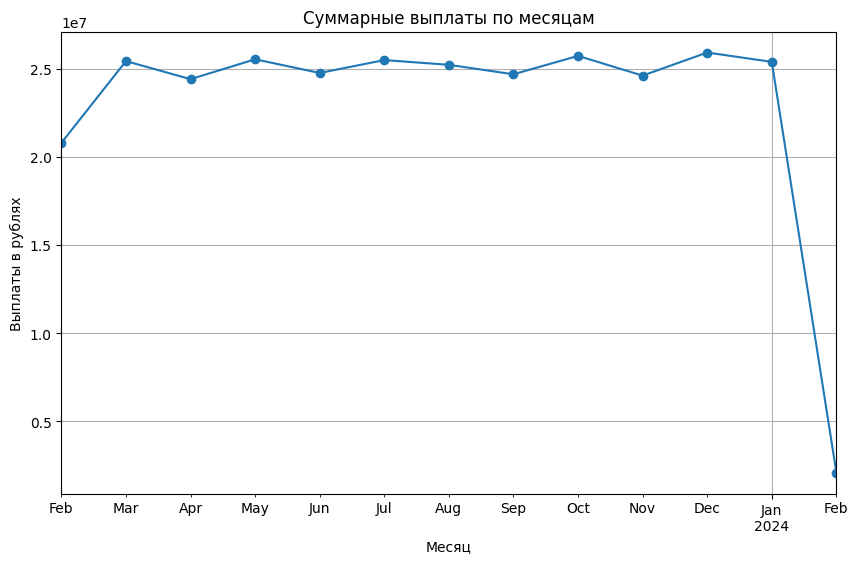

In [6]:
# Группировка данных по месяцам и суммирование выплат
monthly_payouts = df.groupby('month')['total_payout_rub'].sum()

# Построение графика
plt.figure(figsize=(10, 6))
monthly_payouts.plot(kind='line', marker='o')
plt.title('Суммарные выплаты по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выплаты в рублях')
plt.grid(True)
plt.show()


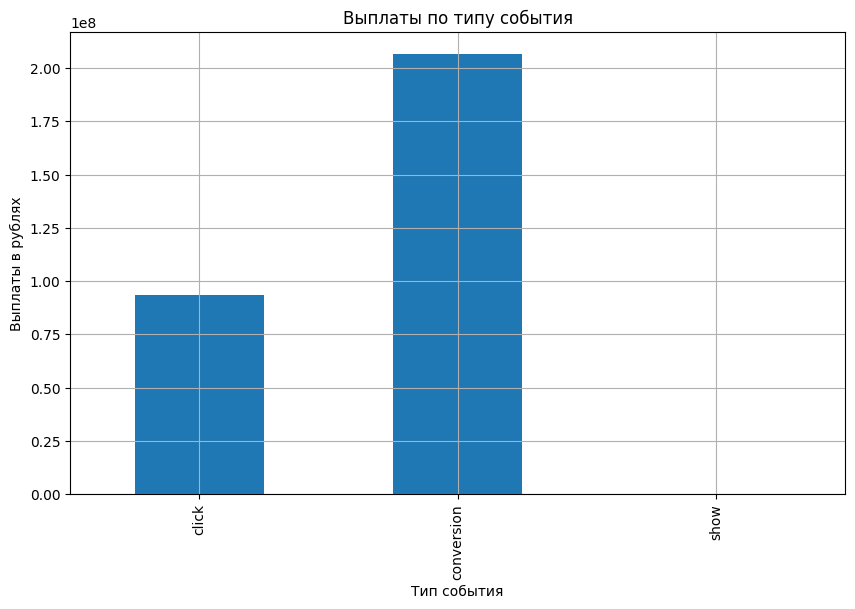

In [7]:
# Группировка данных по типу события и суммирование выплат
event_type_payouts = df.groupby('event_type')['total_payout_rub'].sum()

# Построение графика
plt.figure(figsize=(10, 6))
event_type_payouts.plot(kind='bar')
plt.title('Выплаты по типу события')
plt.xlabel('Тип события')
plt.ylabel('Выплаты в рублях')
plt.grid(True)
plt.show()


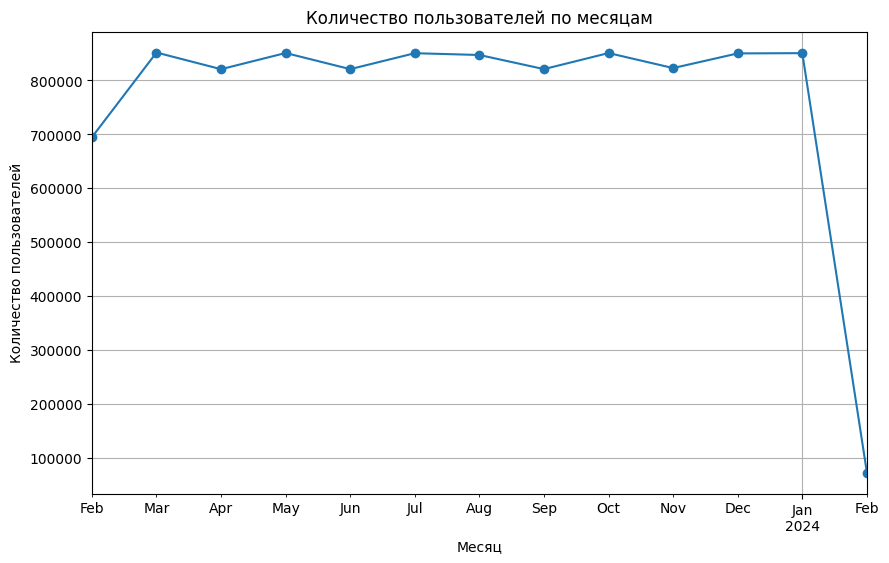

In [9]:
# Группировка данных по месяцам и суммирование количества  пользователей
monthly_users = df.groupby('month')['user_id_cnt'].sum()

# Построение графика
plt.figure(figsize=(10, 6))
monthly_users.plot(kind='line', marker='o')
plt.title('Количество пользователей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()


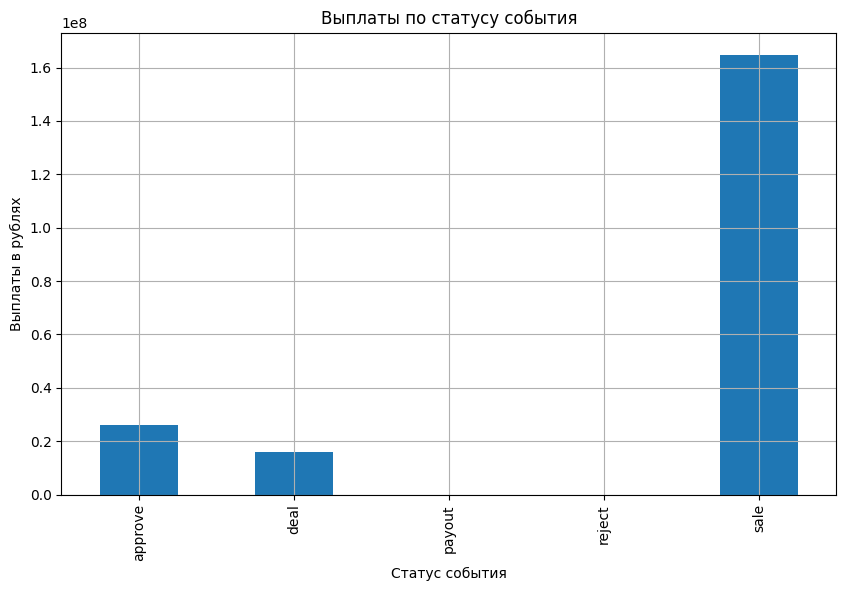

In [10]:
# Группировка данных по статусу события и суммирование выплат
event_status_payouts = df.groupby('event_status')['total_payout_rub'].sum()

# Построение графика
plt.figure(figsize=(10, 6))
event_status_payouts.plot(kind='bar')
plt.title('Выплаты по статусу события')
plt.xlabel('Статус события')
plt.ylabel('Выплаты в рублях')
plt.grid(True)
plt.show()
